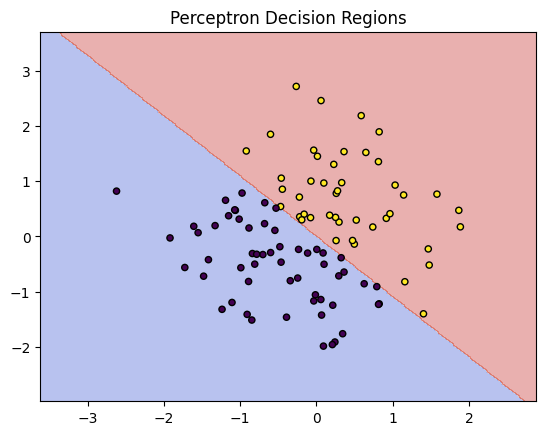

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimplePerceptron:
    def __init__(self, lr=0.1, epochs=10):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                xi = np.insert(xi, 0, 1)  # Add bias term
                prediction = np.dot(self.weights, xi)
                update = self.lr * (target - np.where(prediction >= 0, 1, -1))
                self.weights += update * xi
        return self
    
    def predict(self, X):
        return np.where(np.dot(X, self.weights[1:]) + self.weights[0] >= 0, 1, -1)

# Create synthetic data
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Train perceptron
ppn = SimplePerceptron(lr=0.1, epochs=10)
ppn.fit(X, y)

# Plotting function
def plot_regions(X, y, model):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict and plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    plt.title('Perceptron Decision Regions')
    plt.show()

plot_regions(X, y, ppn)


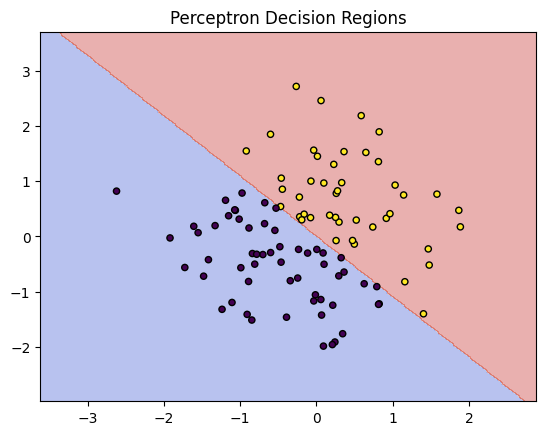

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a simple perceptron class
class SimplePerceptron:
    def __init__(self, lr=0.1, epochs=10):
        # Initialize learning rate and number of epochs (iterations over the dataset)
        self.lr = lr
        self.epochs = epochs
        
    # Train the perceptron using input data X and labels y
    def fit(self, X, y):
        # Initialize weights (1 extra for bias term) with zeros
        self.weights = np.zeros(X.shape[1] + 1)
        
        # Run for the given number of epochs
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                # Add bias input (1) to the input vector
                xi = np.insert(xi, 0, 1)
                # Calculate weighted sum (dot product)
                prediction = np.dot(self.weights, xi)
                # Determine update amount using prediction error
                update = self.lr * (target - np.where(prediction >= 0, 1, -1))
                # Update the weights
                self.weights += update * xi
        return self
    
    # Predict the class labels for input data
    def predict(self, X):
        # Apply the perceptron rule to each input sample
        return np.where(np.dot(X, self.weights[1:]) + self.weights[0] >= 0, 1, -1)

# --------------------------
# Create and train the model
# --------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 random 2D points from a normal distribution
X = np.random.randn(100, 2)

# Define the labels based on whether x1 + x2 > 0
# If true, label is 1; else, label is -1
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Create a perceptron object and train it
ppn = SimplePerceptron(lr=0.1, epochs=10)
ppn.fit(X, y)

# -------------------------
# Define plotting function
# -------------------------

def plot_regions(X, y, model):
    # Set the limits of the plot area
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid of points to test the model across the area
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape predictions to match grid shape

    # Plot the decision boundary with filled contours
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

    # Add title and show plot
    plt.title('Perceptron Decision Regions')
    plt.show()

# Call the plotting function
plot_regions(X, y, ppn)
